In [10]:
import pyccl as ccl
print(f"I am using pyccl version {ccl.__version__}")
from scripts.presets import Presets
from scripts.data_vectors import DataVectors
import numpy as np
from scripts.tomographic_binning import TomographicBinning
from scripts.srd_redshift_distributions import SRDRedshiftDistributions
import matplotlib.pyplot as plt
import cmasher as cmr


I am using pyccl version 3.0.2


In [2]:
# Define paths and parameters
data_path = "data_output/problematic_cls/"
ccl_versions = ["2.8.0", "3.0.2"]
# only first two tuples are problematic i tihnk
problematic_combos = [(3.4, 800), (3.3, 350), (3., 800), (3.5, 800)]

# Dictionary to hold loaded data
data_dict = {}

# Loop through versions and combos
for ccl_version in ccl_versions:
    data_dict[ccl_version] = {}
    for zmax, zres in problematic_combos:
        # File suffix
        fname_suffix = f"y10_zmax{zmax}_zres{zres}_cclv{ccl_version}.npy"

        # Load files into a nested dictionary
        data_dict[ccl_version][(zmax, zres)] = {
            "chi": np.load(f"{data_path}chi_{fname_suffix}", allow_pickle=True),
            "lenses": np.load(f"{data_path}lenses_{fname_suffix}", allow_pickle=True),
            "sources": np.load(f"{data_path}sources_{fname_suffix}", allow_pickle=True),
            "source_bins": np.load(f"{data_path}source_bins_{fname_suffix}", allow_pickle=True).item(),
            "lens_bins": np.load(f"{data_path}lens_bins_{fname_suffix}", allow_pickle=True).item(),
            "source_bin_centers": np.load(f"{data_path}source_bin_centers_{fname_suffix}", allow_pickle=True),
            "lens_bin_centers": np.load(f"{data_path}lens_bin_centers_{fname_suffix}", allow_pickle=True),
            "wl_kernel": np.load(f"{data_path}wl_kernel_{fname_suffix}", allow_pickle=True),
            "nc_kernel": np.load(f"{data_path}nc_kernel_{fname_suffix}", allow_pickle=True),
            "cs_cls": np.load(f"{data_path}cs_cls_{fname_suffix}", allow_pickle=True),
            "gc_cls": np.load(f"{data_path}gc_cls_{fname_suffix}", allow_pickle=True),
            "ggl_cls": np.load(f"{data_path}ggl_cls_{fname_suffix}", allow_pickle=True),
        }

# Data is now loaded into `data_dict`
# Example access: data_dict["2.8.0"][(3.4, 800)]["chi"]


## Test bins (they should be the same as no ccl involved)

/var/folders/0x/z32gfbyx2ls71tblrjjbdh0w0000gn/T/ipykernel_19805/3425941920.py:25: RuntimeWarning: invalid value encountered in divide
  ratio = source_bins_3_0[i] / source_bins_2_8[i]


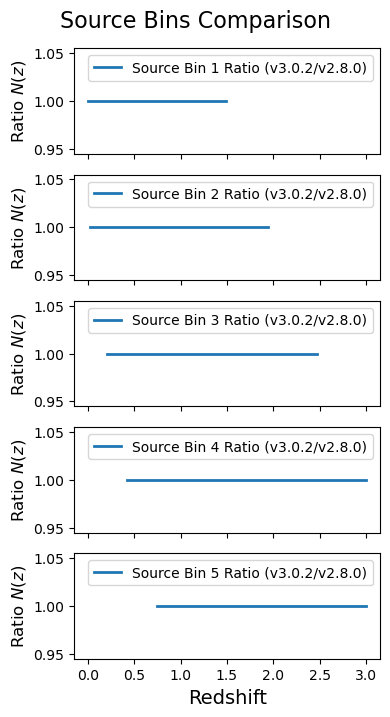

In [3]:
# Define parameters
zmax, zres = 3.4, 800
zmax, zres = 3.3, 350
zmax, zres = 3., 800
redshift_range = np.linspace(0, zmax, zres)

# Load the data
bins_2_8 = data_dict["2.8.0"][(zmax, zres)]
bins_3_0 = data_dict["3.0.2"][(zmax, zres)]

# Extract relevant data
source_bins_2_8, source_bins_3_0 = bins_2_8["source_bins"], bins_3_0["source_bins"]

# Calculate the number of source bins
num_source_bins = len(source_bins_2_8)

# Create subplots for source bins
fig, axes = plt.subplots(num_source_bins, 1, figsize=(4, 1.5* num_source_bins), sharex=True)

# Plot parameters
lw = 2

# Iterate over source bins and plot in subplots
for i, ax in enumerate(axes):
    ratio = source_bins_3_0[i] / source_bins_2_8[i]
    ax.plot(redshift_range, ratio, lw=lw, linestyle='-', label=f"Source Bin {i+1} Ratio (v3.0.2/v2.8.0)")
    ax.set_ylabel("Ratio $N(z)$", fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(False)

# Add a shared x-axis label
axes[-1].set_xlabel("Redshift", fontsize=14)

# Add a title for the entire figure
fig.suptitle(f"Source Bins Comparison", fontsize=16, y=0.95)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [ ]:
# Define parameters
zmax, zres = 3.4, 800
zmax, zres = 3.3, 350
redshift_range = np.linspace(0, zmax, zres)

# Load the data
bins_2_8 = data_dict["2.8.0"][(zmax, zres)]
bins_3_0 = data_dict["3.0.2"][(zmax, zres)]

# Extract relevant data
lens_bins_2_8, lens_bins_3_0 = bins_2_8["lens_bins"], bins_3_0["lens_bins"]

# Calculate the number of lens bins
num_lens_bins = len(lens_bins_2_8)

# Create subplots for lens bins
fig, axes = plt.subplots(num_lens_bins, 1, figsize=(5, 1.2 * num_lens_bins), sharex=True)

# Plot parameters
lw = 2

# Iterate over lens bins and plot in subplots
for i, ax in enumerate(axes):
    ratio = lens_bins_3_0[i] / lens_bins_2_8[i]
    ax.plot(redshift_range, ratio, lw=lw, linestyle='-', label=f"Lens Bin {i+1} Ratio (v3.0.2/v2.8.0)")
    ax.set_ylabel("Ratio $N(z)$", fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(False)

# Add a shared x-axis label
axes[-1].set_xlabel("Redshift", fontsize=14)

# Add a title for the entire figure
fig.suptitle(f"Lens Bins Comparison", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


## Check comoving distance

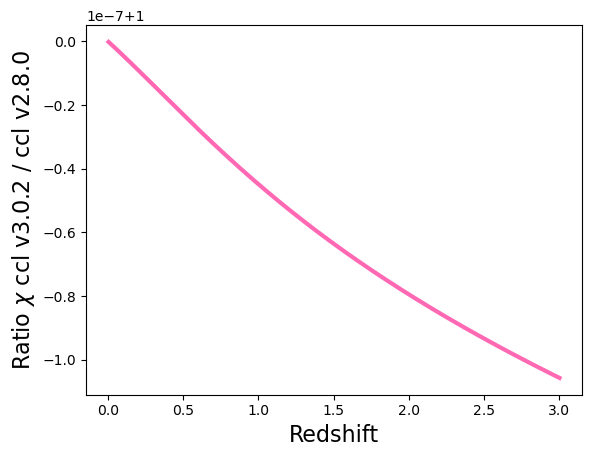

In [5]:
zmax, zres = 3.4, 800
#zmax, zres = 3.3, 350
zmax, zres = 3., 800
redshift_range = np.linspace(0, zmax, zres)

# Load the data
bins_2_8 = data_dict["2.8.0"][(zmax, zres)]
bins_3_0 = data_dict["3.0.2"][(zmax, zres)]

# Extract relevant data
chi_2_8, chi_3_0 = bins_2_8["chi"], bins_3_0["chi"]

# Perform safe division
ratio = np.divide(chi_3_0, chi_2_8, out=np.full_like(chi_3_0, np.nan), where=(chi_2_8 != 0))
plt.plot(redshift_range, ratio, label="chi v3.0.2 / chi v3.0.2", lw=3, c="hotpink")
plt.xlabel("Redshift", fontsize=16)
plt.ylabel("Ratio $\\chi$ ccl v3.0.2 / ccl v2.8.0", fontsize=16)
plt.show()

/var/folders/0x/z32gfbyx2ls71tblrjjbdh0w0000gn/T/ipykernel_19805/149507616.py:25: RuntimeWarning: invalid value encountered in divide
  ratio = (wl_kernel_3_0[i] / wl_kernel_2_8[i])-1
/var/folders/0x/z32gfbyx2ls71tblrjjbdh0w0000gn/T/ipykernel_19805/149507616.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=10)


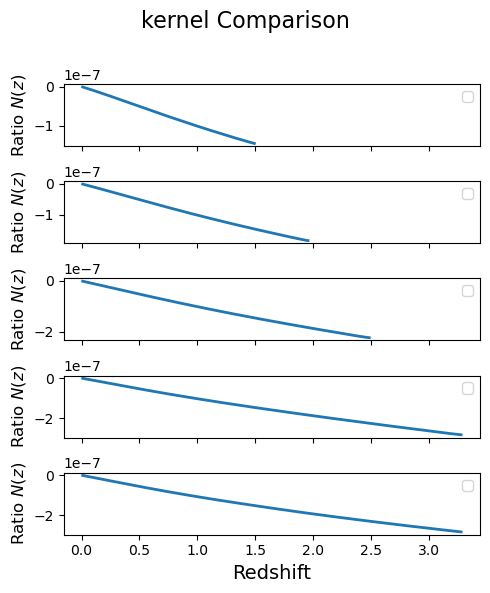

In [6]:
zmax, zres = 3.4, 800
zmax, zres = 3.3, 350
redshift_range = np.linspace(0, zmax, zres)

# Load the data
bins_2_8 = data_dict["2.8.0"][(zmax, zres)]
bins_3_0 = data_dict["3.0.2"][(zmax, zres)]

# Extract relevant data
wl_kernel_2_8, wl_kernel_3_0 = bins_2_8["wl_kernel"], bins_3_0["wl_kernel"]
nc_kernel_2_8, nc_kernel_3_0 = bins_2_8["nc_kernel"], bins_3_0["nc_kernel"]


# Calculate the number of lens bins
num_bins = len(wl_kernel_2_8)

# Create subplots for lens bins
fig, axes = plt.subplots(num_bins, 1, figsize=(5, 1.2 * num_bins), sharex=True)

# Plot parameters
lw = 2

# Iterate over lens bins and plot in subplots
for i, ax in enumerate(axes):
    ratio = (wl_kernel_3_0[i] / wl_kernel_2_8[i])-1
    ax.plot(redshift_range, ratio, lw=lw, linestyle='-')
    ax.set_ylabel("Ratio $N(z)$", fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(False)

# Add a shared x-axis label
axes[-1].set_xlabel("Redshift", fontsize=14)

# Add a title for the entire figure
fig.suptitle(f"kernel Comparison", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## Check cls

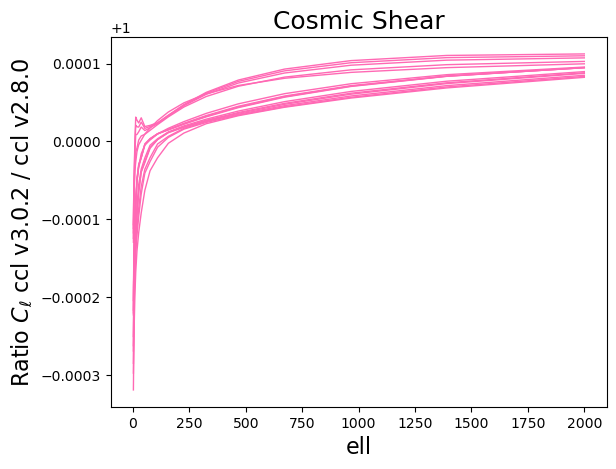

In [7]:
# Define parameters
zmax, zres = 3.4, 800
zmax, zres = 3.3, 350
#zmax, zres = 3., 800
#zmax, zres = 3.5, 800
redshift_range = np.linspace(0, zmax, zres)
ells = np.geomspace(2, 2000, 20)

# Load the data
bins_2_8 = data_dict["2.8.0"][(zmax, zres)]
bins_3_0 = data_dict["3.0.2"][(zmax, zres)]

# Extract relevant data
cs_cls_2_8, cs_cls_3_0 = bins_2_8["cs_cls"], bins_3_0["cs_cls"]
gc_cls_2_8, gc_cls_3_0 = bins_2_8["gc_cls"], bins_3_0["gc_cls"]
ggl_cls_2_8, ggl_cls_3_0 = bins_2_8["ggl_cls"], bins_3_0["ggl_cls"]

# Create subplots for source bins
plt.plot(ells, cs_cls_2_8/cs_cls_3_0, lw=1, c="hotpink")
plt.xlabel("ell", fontsize=16)
plt.ylabel("Ratio $C_\\ell$ ccl v3.0.2 / ccl v2.8.0", fontsize=16)
plt.title("Cosmic Shear", fontsize=18)
plt.show()

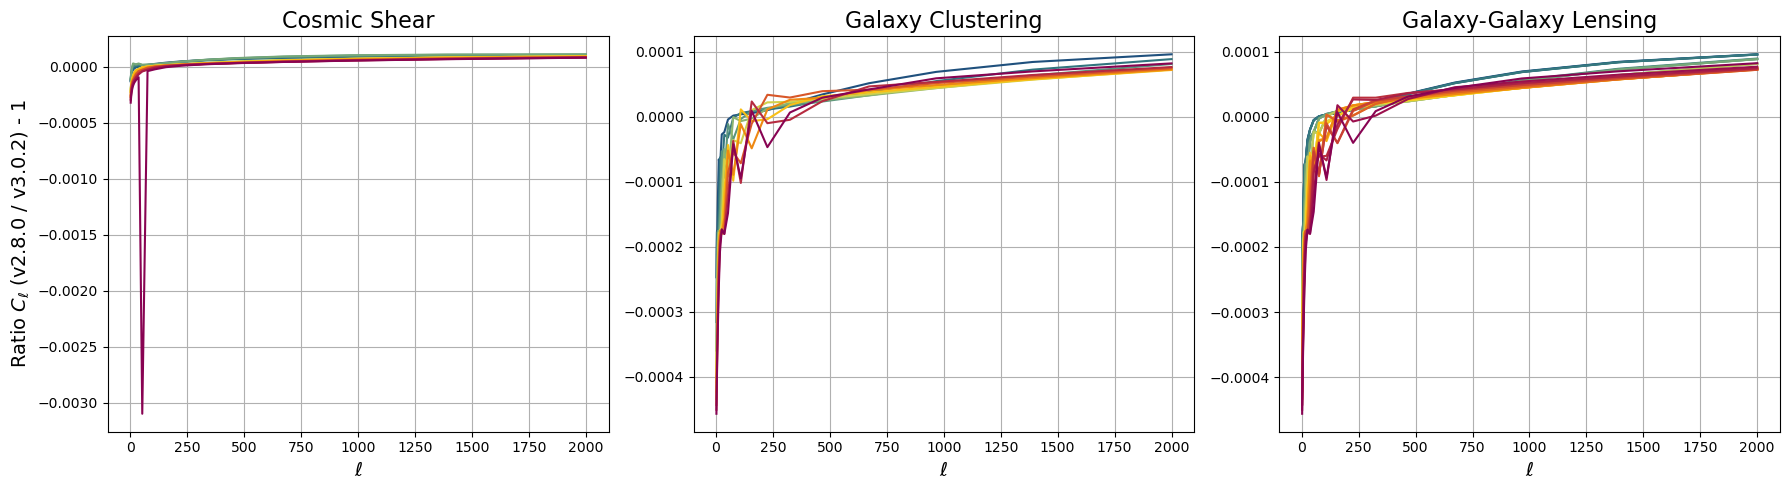

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import cmasher as cmr  # Ensure cmasher is installed

# Define parameters
zmax, zres = 3.4, 800
redshift_range = np.linspace(0, zmax, zres)
ells = np.geomspace(2, 2000, 20)

# Load the data
bins_2_8 = data_dict["2.8.0"][(zmax, zres)]
bins_3_0 = data_dict["3.0.2"][(zmax, zres)]

# Extract relevant data
cs_cls_2_8, cs_cls_3_0 = bins_2_8["cs_cls"], bins_3_0["cs_cls"]
gc_cls_2_8, gc_cls_3_0 = bins_2_8["gc_cls"], bins_3_0["gc_cls"]
ggl_cls_2_8, ggl_cls_3_0 = bins_2_8["ggl_cls"], bins_3_0["ggl_cls"]

# Compute ratios
cs_ratio = (cs_cls_2_8 / cs_cls_3_0) - 1
gc_ratio = (gc_cls_2_8 / gc_cls_3_0) - 1
ggl_ratio = (ggl_cls_2_8 / ggl_cls_3_0) - 1

# Create subplots for cs_cls, gc_cls, and ggl_cls
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

# Cosmic Shear (cs_cls)
colors = cmr.take_cmap_colors("cmr.pride", cs_cls_2_8.shape[1], cmap_range=(0.15, 0.85))
for i in range(cs_cls_2_8.shape[1]):
    axes[0].plot(ells, cs_ratio[:, i], lw=1.5, c=colors[i])
axes[0].set_xlabel("$\\ell$", fontsize=14)
axes[0].set_ylabel("Ratio $C_\\ell$ (v2.8.0 / v3.0.2) - 1", fontsize=14)
axes[0].set_title("Cosmic Shear", fontsize=16)
axes[0].grid(True)

# Galaxy Clustering (gc_cls)
colors = cmr.take_cmap_colors("cmr.pride", gc_cls_2_8.shape[1], cmap_range=(0.15, 0.85))
for i in range(gc_cls_2_8.shape[1]):
    axes[1].plot(ells, gc_ratio[:, i], lw=1.5, c=colors[i])
axes[1].set_xlabel("$\\ell$", fontsize=14)
axes[1].set_title("Galaxy Clustering", fontsize=16)
axes[1].grid(True)

# Galaxy-Galaxy Lensing (ggl_cls)
colors = cmr.take_cmap_colors("cmr.pride", ggl_cls_2_8.shape[1], cmap_range=(0.15, 0.85))
for i in range(ggl_cls_2_8.shape[1]):
    axes[2].plot(ells, ggl_ratio[:, i], lw=1.5, c=colors[i])
axes[2].set_xlabel("$\\ell$", fontsize=14)
axes[2].set_title("Galaxy-Galaxy Lensing", fontsize=16)
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.savefig("data_output/problematic_cls/cls_ratios.png")
plt.show()


In [28]:
# Galaxy-Galaxy Lensing (ggl_cls)
for i in range(ggl_cls_2_8.shape[1]):
    c=cmr.take_cmap_colors("cmr.pride", len(ggl_ratio), cmap_range=(0.15, 0.85))
    axes[2].plot(ells, ggl_ratio[:, i], lw=1.5, c=c[i])
axes[2].set_xlabel("$\\ell$", fontsize=14)
axes[2].set_title("Galaxy-Galaxy Lensing", fontsize=16)
axes[2].grid(True)

IndexError: list index out of range

In [31]:
ggl_cls_3_0.shape

(20, 25)

In [30]:
ggl_ratio.shape

(20, 25)

In [ ]:
1/0

In [ ]:
# problematic_combos are (3.4, 800), (3.3, 350)
zmax, zres = 3.4, 800
#zmax, zres = 3.3, 350
#zmax, zres = 3., 800
#zmax, zres = 3.5, 800
forecast_year = "10"
ccl_version = ccl.__version__

# We now initialize the class by only passing the redshift information.
presets = Presets(redshift_max=zmax,
                  redshift_resolution=zres,
                  forecast_year=forecast_year)

redshift_range = presets.redshift_range
cosmology = presets.cosmology
# Initialise the tomographic binning class
bin = TomographicBinning(presets)
# Get your source and lens redshift distributions
sources = SRDRedshiftDistributions(presets).source_sample()
lenses = SRDRedshiftDistributions(presets).lens_sample()
# Get the source and lens tomo bins
source_bins = bin.source_bins()
lens_bins = bin.lens_bins()
# Get the bin centers for the source and lens bins
source_bin_centers = bin.source_bin_centers()
lens_bin_centers = bin.lens_bin_centers()

dv = DataVectors(presets)
wl_kernel = dv.get_wl_kernel()
nc_kernel = dv.get_nc_kernel()
chi = ccl.comoving_radial_distance(cosmology, 1 / (1 + redshift_range))

cs_cls = dv.cosmic_shear_cls()
gc_cls = dv.galaxy_clustering_cls()
ggl_cls = dv.galaxy_galaxy_lensing_cls()


In [ ]:
%%time
# save files
data_path = "data_output/problematic_cls/"
fname_suffix = f"y{forecast_year}_zmax{zmax}_zres{zres}_cclv{ccl_version}.npy"
np.save(f"{data_path}chi_{fname_suffix}", chi)
np.save(f"{data_path}lenses_{fname_suffix}", lenses)
np.save(f"{data_path}sources_{fname_suffix}", sources)
np.save(f"{data_path}source_bins_{fname_suffix}", source_bins)
np.save(f"{data_path}lens_bins_{fname_suffix}", lens_bins)
np.save(f"{data_path}source_bin_centers_{fname_suffix}", source_bin_centers)
np.save(f"{data_path}lens_bin_centers_{fname_suffix}", lens_bin_centers)
np.save(f"{data_path}wl_kernel_{fname_suffix}", wl_kernel)
np.save(f"{data_path}nc_kernel_{fname_suffix}", nc_kernel)
np.save(f"{data_path}cs_cls_{fname_suffix}", cs_cls)
np.save(f"{data_path}gc_cls_{fname_suffix}", gc_cls)
np.save(f"{data_path}ggl_cls_{fname_suffix}", ggl_cls)